@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import piecewise_regression

# from reg import quicklook, break_regression
import reg

import reg.calc_utilities as calc

In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv"]

index = 0

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col="TimeUTC")

In [3]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,E1,E2,E3,E4,E5,E6,E7,DT,PA
TimeUTC,,,,,,,,,,,,,,,,,,
2023-03-12 00:00:00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,11.40,0.0,0.0,0.000,0.000,0.00,86.490453
2023-03-12 00:00:24,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0144,167.0,0.0,7.58,0.0,0.0,0.000,0.000,0.00,81.321720
2023-03-12 00:00:48,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0,0.627,0.000,0.00,69.690026
2023-03-12 00:01:12,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,112.0,17.6,0.00,0.0,0.0,0.313,0.000,0.00,70.727876
2023-03-12 00:01:36,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,55.8,0.0,0.00,0.0,0.0,0.000,0.000,0.00,68.520445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:58:00,61.2,7.14,3.95,3.42,1.590,0.000,0.142,0.0671,0.0144,7090.0,2200.0,865.00,325.0,10.5,0.314,0.000,1.29,100.899747
2023-03-14 23:58:24,24.5,14.30,9.88,5.70,1.590,0.954,0.142,0.0671,0.0000,5030.0,1920.0,819.00,309.0,21.0,0.000,0.088,1.12,84.530333
2023-03-14 23:58:48,61.2,21.40,9.89,2.28,1.590,0.000,0.142,0.0671,0.0000,6480.0,2360.0,895.00,262.0,16.8,0.314,0.000,1.46,95.456014


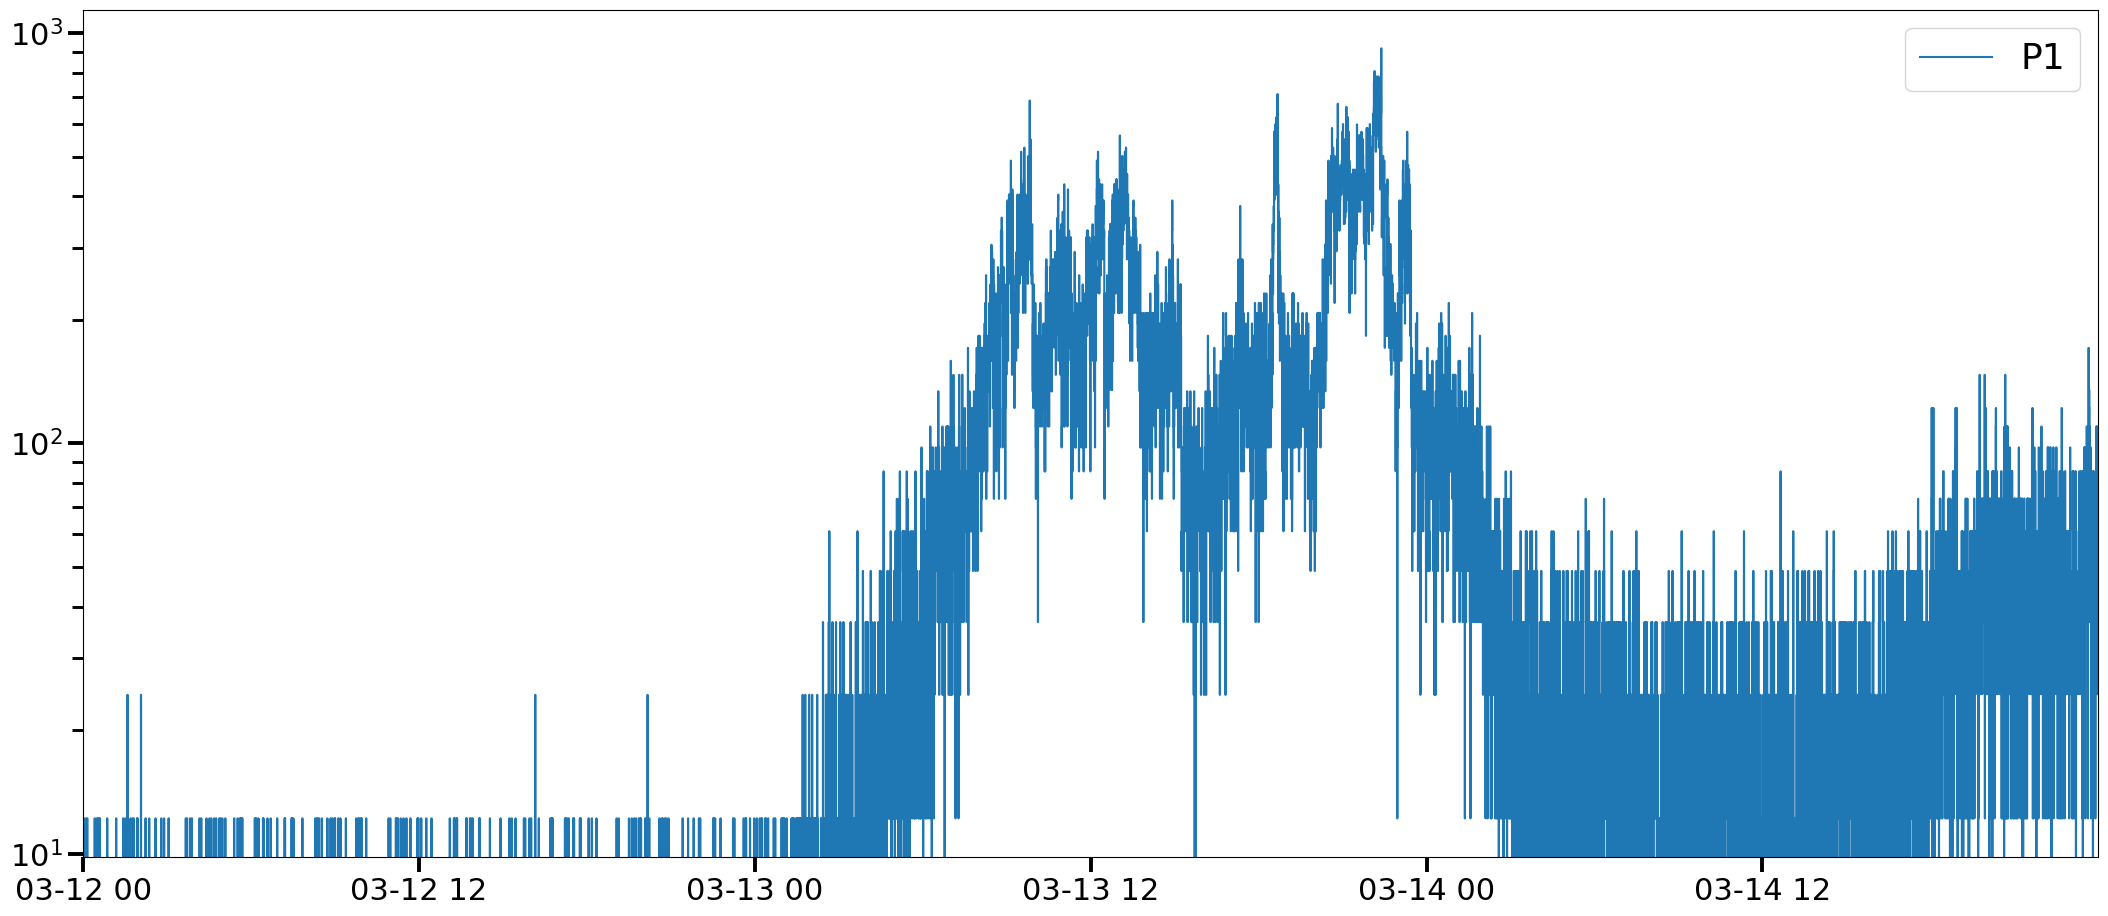

In [4]:
reg.quicklook(data=df, channel="P1", resample=None)

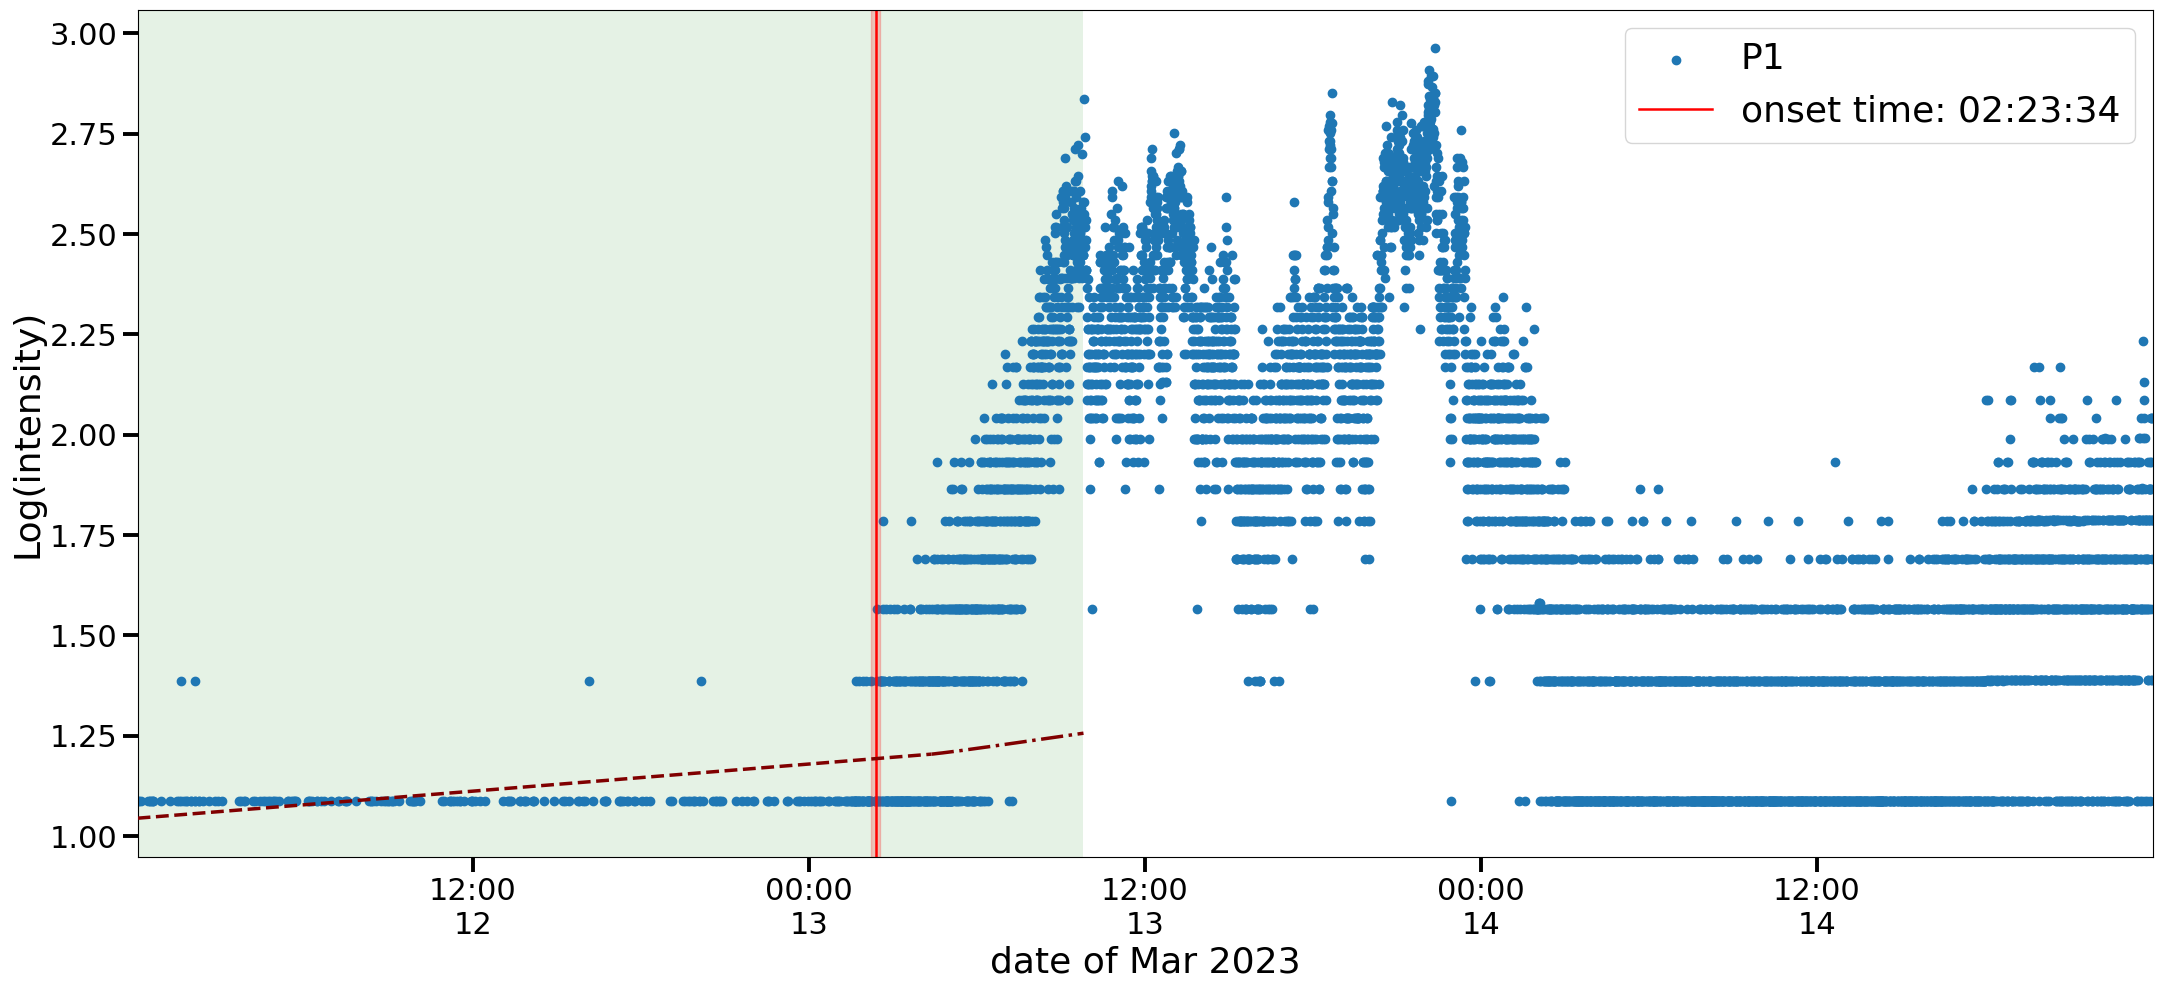

In [5]:
results = reg.workflow(data=df, channel="P1", window=100, threshold=2, diagnostics=True,
                              index_choice="time_s")

In [6]:
results

{'const': np.float64(-2624.1039598251164),
 'slope1': np.float64(1.5639174544343407e-06),
 'slope2': np.float64(6.646351575708749e-05),
 'onset_time': Timestamp('2023-03-13 02:23:34.595935822'),
 'onset_time_error_minus': Timestamp('2023-03-13 02:14:23.925742865'),
 'onset_time_error_plus': Timestamp('2023-03-13 02:32:45.266128778'),
 'line1': 1678572120    1.044277
 1678572360    1.044653
 1678572528    1.044915
 1678573488    1.046417
 1678573752    1.046829
                 ...   
 1678674024    1.203647
 1678674048    1.203684
 1678674096    1.203759
 1678674120    1.203797
 1678674192    1.203909
 Length: 411, dtype: float64,
 'line2': (1678674216    1.203909
  1678674264    1.203976
  1678674288    1.204042
  1678674312    1.204109
  1678674336    1.204176
                  ...   
  1678693632    1.255817
  1678693656    1.255884
  1678693680    1.255950
  1678693704    1.256017
  1678693728    1.256083
  Length: 785, dtype: float64,),
 'series': (TimeUTC
  2023-03-12 00:02:00   

In [9]:
results

{'const': np.float64(-2624.103959825118),
 'slope1': np.float64(1.5639174544343432e-06),
 'slope2': np.float64(6.646351575708753e-05),
 'onset_time': Timestamp('2023-03-13 02:23:34.595935822'),
 'onset_time_error_minus': Timestamp('2023-03-13 02:14:23.925742865'),
 'onset_time_error_plus': Timestamp('2023-03-13 02:32:45.266128778'),
 'line1': 1678572120    1.044277
 1678572360    1.044653
 1678572528    1.044915
 1678573488    1.046417
 1678573752    1.046829
                 ...   
 1678674024    1.203647
 1678674048    1.203684
 1678674096    1.203759
 1678674120    1.203797
 1678674192    1.203909
 Length: 411, dtype: float64,
 'line2': (1678674216    1.203909
  1678674264    1.203976
  1678674288    1.204042
  1678674312    1.204109
  1678674336    1.204176
                  ...   
  1678693632    1.255817
  1678693656    1.255884
  1678693680    1.255950
  1678693704    1.256017
  1678693728    1.256083
  Length: 785, dtype: float64,),
 'series': (TimeUTC
  2023-03-12 00:02:00    